<a href="https://colab.research.google.com/github/raulsomazabracho/Deep-Learning/blob/main/Redes_Neuronales_Tensor_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

https://www.youtube.com/watch?v=tPYj3fFJGjk

## TensorFlow
TensorFlow es una biblioteca de código abierto para aprendizaje automático a través de un rango de tareas, y desarrollado por Google para satisfacer sus necesidades de sistemas capaces de construir y entrenar redes neuronales para detectar y descifrar patrones y correlaciones

### Importar TensorFlow

In [ ]:
#Librerias Requeridas
!pip install tensorflow
!pip install tensorflow-gpu
%tensorflow_version 2.x 
import tensorflow as tf
print(tf.version) #Asegurarse que la versión sea la correcta

     |████████████████████████████████| 489.6 MB 22 kB/s 
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


## Tensores

### Definición

"A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes." (https://www.tensorflow.org/guide/tensor)

It should't surprise you that tensors are a fundemental apsect of TensorFlow. They are the main objects that are passed around and manipluated throughout the program. Each tensor represents a partialy defined computation that will eventually produce a value. TensorFlow programs work by building a graph of Tensor objects that details how tensors are related. Running different parts of the graph allow results to be generated.

Each tensor has a data type and a shape. 

**Data Types Include**: float32, int32, string and others.

**Shape**: Represents the dimension of data.

Just like vectors and matrices tensors can have operations applied to them like addition, subtraction, dot product, cross product etc.

### Crear un Tensor

Para crear un tensor se debe definir la variable y el tipo de tensor

In [ ]:
string = tf.Variable("Esto es un string", tf.string)
enero= tf.Variable(5,tf.int16)
floating = tf.Variable(3.14,tf.float64) 

### Rank/Degree de un tensor

Los primeros que creamos eran de una dimension---> escalar, pero se puede definir el grado de cada tensor

In [ ]:
rank1_tensor = tf.Variable(['Test'], tf.string)
rank2_tensor = tf.Variable([['Test','ok'],['Test', 'Yes']])

Ranking: Es el numero de indices requerido para acceder a cada elemento unico del tensor
Shape : el numero de elementos que existe en cada dimension

In [ ]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

La forma (shape) es la cantidad de elementos en cada dimension

In [ ]:
rank2_tensor.shape

TensorShape([2, 2])

### Cambiar la forma del tensor

In [ ]:
tensor1 = tf.ones([1,2,3])  # tf.ones() crea un tensor de forma [1,2,3] lleno de unos
tensor2 = tf.reshape(tensor1, [2,3,1])  # cambia la forma del tensor a [2,1,3]
tensor3 = tf.reshape(tensor2, [3, -1])  # -1 le dice al tensor que calcule la forma que debe tener
                                        # esto va a cambiar la forma a [3,2]
                                                                             
# The numer of elements in the reshaped tensor MUST match the number in the original

In [ ]:
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


### Slicing Tensors

Al igual que en listas y matrices slicing nos permite a acceer a elementos especificos del tensor

In [ ]:
# Crear untensor 2D
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor = tf.Variable(matrix, dtype=tf.int32) 
print(tf.rank(tensor))
print(tensor.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


In [ ]:
# Seleccionemos distintos elementos del tensor

three = tensor[0,2]  # selecciona el tercer elemento del primer elemento
print(three)  # -> 3

row1 = tensor[0]  # selecciona la primera fila
print(row1)

column1 = tensor[:, 0]  # selecciona la primera columna
print(column1)

row2and4= tensor[1::2]  # selecciona seunga y cuarta fila
print(row2and4)

column_1_in_row_2_and_3 = tensor[1:3, 0] #selecciona filas 2 y 3 la primera columna
print(column_1_in_row_2_and_3)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


# Modelo Basicos de Machine Learning

## Regresión Lineal

### Concepto

Grafica puntos en una curva y crea la funcion que mas se le aproxime, para generar prediciones a futuro

(0.0, 6.0, 0.0, 20.0)

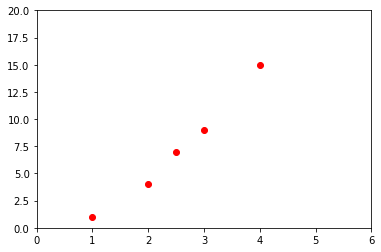

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

Creamos la recta (1D) que mas se le aproxime a los puntos
y = mx+b

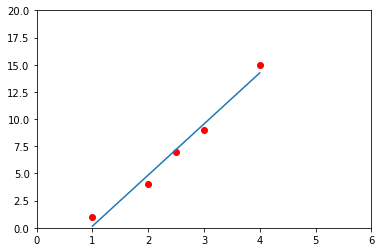

In [ ]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

Ya con est ose pueden hacer predicciones a futuro, pasamos los puntos a la escuacion de la recta generada y vemos el output---> la prediccion

### Ejemplo practico

#### Configuraciones Iniciales

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

#### Importamos la data

In [ ]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dftest = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived') #separamos la columna 'survived' que es nuestro target
y_test = dftest.pop('survived')

In [ ]:
dftrain.head(5)

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

#### Graficamos los features

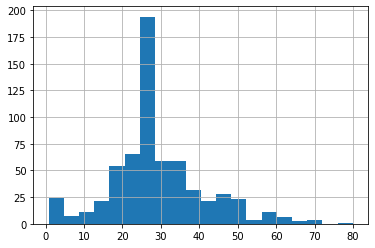

In [ ]:
dftrain.age.hist(bins =20)

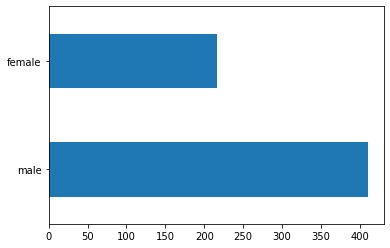

In [ ]:
dftrain.sex.value_counts().plot(kind ='barh')

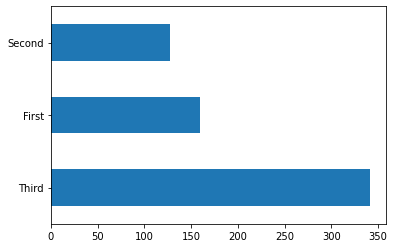

In [ ]:
dftrain['class'].value_counts().plot(kind = 'barh')

Text(0.5, 0, '% survive')

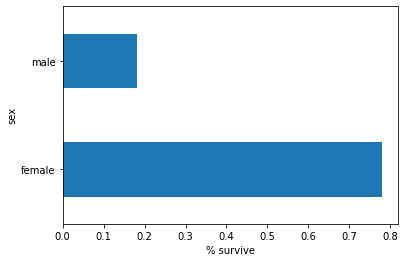

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

#### Tratar con variables categoricas

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

#Tratemos las variable categoricas
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # obtiene lista de todos los valores unicos de la columna
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)) # funcion de tensorflowp ra tranformar la variable categorica en numerica

#Tratemos las variables numericas
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

#### TRAIN/TEST

Para poder hacer machine learnig la data debe estar en ```tf.data.Dataset```, esto requiere 2 cosas:

1-En tensorflor la data debe dividirve en "epoch" lo cual define cuantas veces el modelo observará la misma data, si epoch = 10 entonces el modelo verá la data 10 veces para entrenarse
2-También hay qye crear "batches" que son segmentos de la data

Para esto debemos crear una funcion que tome el dataframe y cree el objeto con sus respectivos "epochs" y "batches", la vual ya viene desde tensorflow

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # funcnion interna, la cual será retornada
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # crea el objeto tetf.data.Dataset con su data y su target(label)
    if shuffle:
      ds = ds.shuffle(1000)  # randomiza el orden de la data
    ds = ds.batch(batch_size).repeat(num_epochs)  # divide la data en trozos de 32 y repite para cada epoch (en este caso 32 trozos y 10 epochs)
    return ds  # returna el trozo del dataset
  return input_function  # return la funcion

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
test_input_fn = make_input_fn(dftest, y_test, num_epochs=1, shuffle=False)

#### Creacion del modelo

Uilizamos la función de tensor flow de estimacion lineal

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpkv2q5fua', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Entrenamiento del modelo

Utilizamos la funcion creada en el paso previo

In [ ]:
linear_est.train(train_input_fn)  # entrenamiento
result = linear_est.evaluate(test_input_fn)  # obtener las metricas y evaluciones

clear_output()  # limpia el output de la consola
print(result['accuracy'])  # imprima el accuracy

0.75


Hacemos predicciones y calculamos la probabilidad de supervivencia para graficarlo

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpkv2q5fua/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


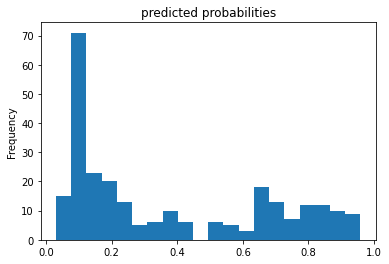

In [ ]:
pred_dicts = list(linear_est.predict(test_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

## Classification (Red Neuronal)

Ahora haremos un ejercicio de clasificación con tensorflow utilizando el dataset de clasificación de flores

#### Configuraciones Iniciales

In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Lets define some constants to help us later on

#### Importamos la data

In [ ]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

In [ ]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


#### Input Function

Hay que volver a crear la funcion que separara la data en tandas y en numero de veces a entrenar el modleo como en el modelo anterior

In [ ]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)


#### Tratar con las variables

In [ ]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


#### Creación del modelo

- ```DNNClassifier``` (Deep Neural Network)

Utilizaremos red neuronal pq es probable que una proximación lineal no nos dé el resultado que buscamos

Configuraremos 2 capas econdidascon 30 y 10 neuronas respectivamente, es lo qe nos recomienda la documentación oficial de TensorFlow 

Se puede jugar con esto hasta obtener el mejor resultado

In [ ]:
# Crear red neuronal con 2 capas y 30 y 10 neurnoas cada una
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Acá se configuran las 2 capas.
    hidden_units=[30, 10],
    # Le decimos al modelo que hay 3 clases de labels paraa grupar
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp6ccjkp44', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Entrenamos al modelo

Definimos una funcion lambda para no tener que hacer una funcion dentro de otra como en el modelo anterior
Steps = en lugar de epochs, aca se le dice al modelo entrenar hasta haber visto 5000 registros

In [ ]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp6ccjkp44/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.2192383, step = 0
INFO:tensorflow:global_step/sec: 346.715
INFO:tensorflow:loss = 0.8523549, step = 100 (0.295 sec)
INFO:tensorflow:global_step/sec: 391.444
INFO:tensorflow:loss = 0.77367115, step = 200 (0.251 sec)
INFO:tensorflow:global_step/sec: 412.324
INFO:tensorflow:loss = 0.71575236, step = 300 (0.246 sec)
INFO:tensorflow:global_step/sec: 427.325
INFO:tensorflow:loss = 0.67827994, step = 400 (0.233 sec)
INFO:tensorflow:global_step/sec: 433.332
INFO:tensorflow:loss = 0.6496017, step = 500 (0.232 sec)
INF

#### Evaluamos el modelo

In [ ]:
test_result = classifier.evaluate(input_fn=lambda: input_fn(test, test_y, training=False))
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**test_result ))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-12-30T13:30:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp6ccjkp44/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.31575s
INFO:tensorflow:Finished evaluation at 2021-12-30-13:30:55
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.93333334, average_loss = 0.33408538, global_step = 5000, loss = 0.33408538
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp6ccjkp44/model.ckpt-5000

Test set accuracy: 0.933



#### Predicción

Se creó la función par hacer la predicción de manera automatica

In [ ]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))

Please type numeric values as prompted.
SepalLength: 3.1
SepalWidth: 4.5
PetalLength: 3.0
PetalWidth: 5.2
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp6ccjkp44/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Virginica" (99.5%)


## Hidden Markov Model

Un sistema de Markov se defina por estados que tienen una observación dentro de una función multidimensional de probabilidad, y la transición entre estados está definidad por una probabilidad llamada "transition probability"

Ejemplo con el clima:

State----> frio/calor

Observation----> tim tiene 20% de probabilidad de estar feliz si hace frio y 80% si hace calor

Transition Probability----> un dia frio tiene 70% de probabilidad de ser seguido de otro dia frio y un 30% de ser seguido de un dia caliente

### Configuraciones Básicas

In [ ]:
import tensorflow_probability as tfp  # utilizamos otro modulo de tensorflow para esto
import tensorflow as tf

### Importamos la Data

###Weather Model
Taken direclty from the TensorFlow documentation (https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel). 

We will model a simple weather system and try to predict the temperature on each day given the following information.
1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is
 normally distributed with mean and standard deviation 0 and 5 on
 a cold day and mean and standard deviation 15 and 10 on a hot day.

If you're unfamiliar with **standard deviation** it can be put simply as the range of expected values. 

In this example, on a hot day the average temperature is 15 and ranges from 5 to 25.

To model this in TensorFlow we will do the following.


In [ ]:
#HAY QUE REMARCAR QUE COLD DAY ES 0 ASI QUE SIEMPRE EL INDEX 0 HACE REFERENCIA A COLD DAY

tfd = tfp.distributions  # making a shortcut for later on
initial_distribution = tfd.Categorical(probs=[0.8, 0.2])  # la probabilidad inicial 0.2 caliente 0.8 frio
transition_distribution = tfd.Categorical(probs=[[0.6, 0.4],
                                                 [0.2, 0.8]])  # probabilidades de transition, cold day y hot day
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # distribicion del punto 5 se coloca . pq deben ser float

# the loc argument represents the mean and the scale is the standard devitation

### Modelamos

steps: 

Si quieremos ver la probabilidad de la temperatura en una semana serian 7 dias --> 7 steps

In [ ]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7) #steps es cuantas veces realiza el modelado

In [ ]:
mean = model.mean()

#por la manera en qye tensorflow trabaja debeoms ver la parte interna de la sesión 

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
with tf.compat.v1.Session() as sess:  
  print(mean.numpy())

[2.9999998 7.200001  8.88      9.552001  9.820802  9.928322  9.971331 ]


# Redes Neuronales

## Keras

Keras es una api que corre sobre python que permite realizar algoritmos de deep learning de manera mas sencilla,a utilizando menos gpu y cpu
Y facilita no tener que construir un algoritmo de red neuronal desde cero y ahorra mucha matematica que corre por detrás

## Configuraciones iniciales

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Otras librerias
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


## Carga de Data

Se va a cargar una base de datos de imagenes que ya tiene Keras en su API (llamada mnist), la cual consiste en imagenes de ropa, con 60.000 imagenes de entrenamiento y 10,000 imagenes de test/validación

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # carga del dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Se observan las imagenes que tienen 28x28 pixeles cada una

In [ ]:
train_images.shape

(60000, 28, 28)

Cada pixel está en una escala de grises que va de 0 a 255, observemos uno en especifico

In [ ]:
train_images[0,23,21]

188

Observemos los primeros 10 labels de entrenamiento, cada label es un valor dentro de un array que identifica la prenda en la imagen

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
#Creamos una lista para poder identificar cada prenda
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

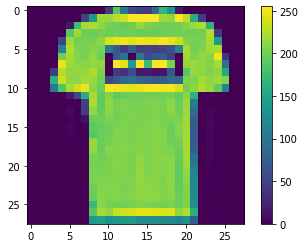

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## Procesamiento de la data

Hay que ajustar la escala de grises, para que esté entre 0 y 1 y no entre 0 y 255

In [ ]:
train_images = train_images / 255.0
test_images = test_images /255.0

## Creación del modelo

Para la creación del modelo utilizaremos sequantial de keras que permite hacer nua red neuronal de izquierda a derecha utilizando los distintos parametros asociados a una red neuronal

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**input layer**: se le está diciendo al modelo que el ingreso de cada data tendrá una forma de 28 x 28, u utilizamoss "Flattern" para que el modelo aplane esta entrada y la convierta en un array de 784 valores, asignandole una neurona a cada valor

**Hidden layer**: utilizamos "Dense" para decirle al modelo que se conecte completamente con la capa anterior, esta capa tiene 128 neuroas y el activation function es "relu", que elimina los negativos y los positivos los mantiene con su mismo valor

**Output layer**:pasamos 10 de parametro pq hay 10 clasificaciones, y utilizamos "softmax" para asociar cada clase a una distribucion de probabilidad, entonces cada valoe estará entre  0 y 1 donde mientras mas cercano a 1 mas probable de que el valor pertenezca a la clase en cuestion

## Loss Function

Ahora hay que definir una funcion de perdida para el modelo
Utilizaremos uno que utilice "gradient descent" y que compare el accuracy del modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamos el modelo

In [ ]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4961 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3731 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3363 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3127 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2954 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2804 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2685 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2601 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2506 - accuracy: 0.9053
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.24

## Evaluamos el modelo

In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose = 1)
print("Accuracy: ", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3352 - accuracy: 0.8825
Accuracy:  0.8824999928474426


## Hacemos Predicciones

In [ ]:
predictions = model.predict(test_images)

In [ ]:
#Observemos la prediccion de la primera imagen
predictions[0]

array([4.0978780e-06, 7.3702305e-10, 9.0203537e-07, 1.8417321e-08,
       2.1537463e-07, 1.8525377e-04, 1.6277918e-05, 1.0412643e-02,
       4.5172237e-06, 9.8937607e-01], dtype=float32)

In [ ]:
#berservemos la probabilidad mas alta utilizando numpy
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

## Verificamos predicciones

Pick a number: 12


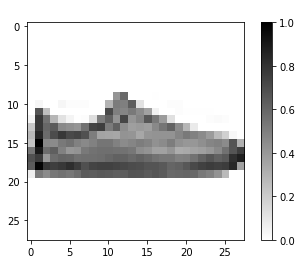

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)